In [1]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
# %%timeit -n 1
# Load your data  -- start with data.csv... then Life Expectancy - and then anyone you choose
# Replace with your dataset... for instance - if it is on github -use:  https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv
df = pd.read_csv('https://raw.githubusercontent.com/fenago/MLEssentials2/main/datasets/cardata.csv')

In [3]:
len(df)

11914

In [4]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
df.shape

(11914, 16)

In [6]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [7]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [8]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [10]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury


In [13]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Also replace your X label
plt.figure(figsize=(6, 4))

sns.histplot(df.life_expectancy, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('life_expectancy')
plt.title('Distribution of prices')

plt.show()

AttributeError: 'DataFrame' object has no attribute 'life_expectancy'

<Figure size 432x288 with 0 Axes>

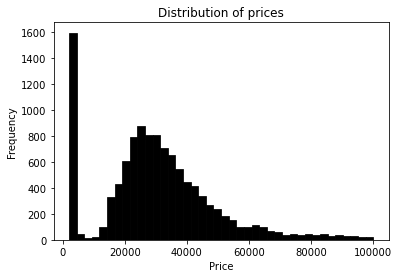

In [14]:
# This may not be needed for your dataset but explore with different features
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

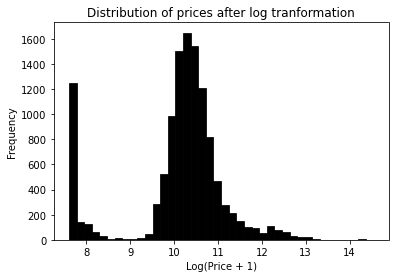

In [15]:
# This may not be needed for your dataset but explore with different features

log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [16]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury


In [19]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
df = df.drop(['market_category'], axis=1)
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,50920


In [ ]:
'''
# Split the data into test, train, validation sets... 60/20/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
# This splits df_train_full again so it is 60/20/20
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
len(df_train), len(df_val), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)
len(df_train),len(df_val),len(df_test)
'''

In [20]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(9531, 2383)

In [22]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.msrp).values
y_test = (df_test.msrp).values
del df_train_full['msrp']
del df_test['msrp']


In [23]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [28]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.get_feature_names_out()  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [25]:
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Fit the model - this will take some time and will burn CPU (not MEMORY)
lr = LinearRegression().fit(X_train, y_train)

In [29]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(lr)

['n_features_in_', 'coef_', 'rank_', 'singular_', 'intercept_']

In [30]:
type(X_train)
type(dv.get_feature_names_out())
type(lr.coef_)

numpy.ndarray

In [31]:
lr.coef_[0]
print('%.3f' % lr.intercept_, '(Intercept)') 
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(features, lr.coef_): print('%.3f' % j, i)

-2770497190284.753 (Intercept)
292.555 city_mpg
2787475201112.563 driven_wheels=all_wheel_drive
2787475200155.438 driven_wheels=four_wheel_drive
2787475199365.664 driven_wheels=front_wheel_drive
2787475198204.123 driven_wheels=rear_wheel_drive
275.440 engine_cylinders
-5513715503280.036 engine_fuel_type
5496.834 engine_fuel_type=diesel
9078.381 engine_fuel_type=electric
-596.501 engine_fuel_type=flex-fuel_(premium_unleaded_recommended/e85)
-991.909 engine_fuel_type=flex-fuel_(premium_unleaded_required/e85)
-1433.630 engine_fuel_type=flex-fuel_(unleaded/e85)
36425.212 engine_fuel_type=flex-fuel_(unleaded/natural_gas)
14451.796 engine_fuel_type=natural_gas
-1216.025 engine_fuel_type=premium_unleaded_(recommended)
-302.247 engine_fuel_type=premium_unleaded_(required)
-326.951 engine_fuel_type=regular_unleaded
124.514 engine_hp
-24.814 highway_mpg
4050792334.688 make=acura
-1381855340.648 make=alfa_romeo
-170588242.697 make=aston_martin
-3094264516.983 make=audi
1159244748.149 make=bentley

In [32]:
# %%timeit -n 1
y_pred = lr.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results


,Actual,Predicted
0,40370,38541.700195
1,21999,22941.617676
2,27380,34450.883789
3,49515,62911.072266
4,29079,28674.872559
...,...,...
2378,21950,19827.906250
2379,27990,33252.604980
2380,63600,70827.851074
2381,47950,49243.802246


In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1308229.19952139
Mean Squared Error: 918431861741221.1
Root Mean Squared Error: 30305640.757806476


In [34]:
# View the coefficients
print(lr.intercept_)
print(lr.coef_)

-2770497190284.753
[ 2.92555262e+02  2.78747520e+12  2.78747520e+12 ... -1.35944164e+09
 -1.35944117e+09  6.67754639e+02]


In [35]:
pred_y = lr.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

mse = metrics.mean_squared_error(y_test, pred_y)
print("Mean Squared Error {}".format(mse))

The first 10 prediction [38542. 22942. 34451. 62911. 28675. 43900. 38060. 74618. 25112. 43424.]
The real first 10 labels [40370 21999 27380 49515 29079 48100 36931 87495 24080 41000]
Mean Squared Error 918431861741221.1


In [36]:
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [37]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert any record into a dictionary
df_train_full.iloc[[21]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
7912,nissan,quest,2016,regular_unleaded,260.0,6.0,automatic,front_wheel_drive,4.0,compact,passenger_minivan,27,20,2009


In [38]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'make': 'gmc',
 'model': 'sierra_1500_classic',
 'year': 2007,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 285.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'vehicle_size': 'large',
 'vehicle_style': 'crew_cab_pickup',
 'highway_mpg': 19,
 'city_mpg': 15,
 'popularity': 549}

In [39]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'make': 'chevrolet',
 'model': 'cruze_limited',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 138.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 39,
 'city_mpg': 26,
 'popularity': 1385}

In [40]:
#car = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [41]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [42]:
model_prediction(item,dv,lr)

30266.083984375

In [43]:
actual

array([26820])

In [44]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [45]:
#Algorithm Test Harness for Regression Algorithms

In [46]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [47]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [48]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [49]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.008s
	Prediction time: 0.806s
	Explained variance: 0.9190028853326022
	Mean absolute error: 4459.629374737726
	R2 score: 0.9189589206516591

GradientBoostingRegressor()
	Training time: 11.466s
	Prediction time: 0.006s
	Explained variance: 0.9545910470818644
	Mean absolute error: 6122.734568945705
	R2 score: 0.954590862862533

ExtraTreesRegressor()
	Training time: 28.507s
	Prediction time: 0.047s
	Explained variance: 0.9885748337828343
	Mean absolute error: 2651.121876795671
	R2 score: 0.9885747477773199

RandomForestRegressor()
	Training time: 14.958s
	Prediction time: 0.043s
	Explained variance: 0.9861302558305933
	Mean absolute error: 2846.2977563598442
	R2 score: 0.9861277447885051

DecisionTreeRegressor()
	Training time: 0.264s
	Prediction time: 0.002s
	Explained variance: 0.9876085393104216
	Mean absolute error: 2952.524102694143
	R2 score: 0.987608535968781

LinearRegression()
	Training time: 1.503s
	Prediction time: 0.001s
	Explained varia

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.742e+10, tolerance: 3.712e+09
  model = cd_fast.enet_coordinate_descent(


## R2 Score with Regression Models
The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset. 
### Simply put, R2 is the difference between the samples in the dataset and the predictions made by the model.
The R2 score of the models trained here range from .91 to .98 (notice that LR does not converge so it's score is unknown). 
### If the value of the r squared score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset. This also implies that the closer the value of the r squared score is to 1, the more perfectly the model is trained.
# In summary - look for the models with the highest R2 values

In [50]:
# Assuming XGBoost is the best model - let's find the best hyperparameters

# If you want to find the best parameters for a model - do a grid search over several features (or a random search)
# A. Do model.get_params()    to get all of the existing hyperparameters for the model
# B. Create a dictionary with different hyperparameter options
# C. Run the GridSearch and it will find the best parameters
# D. Be patient because this will take a long time.

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = { 'loss' : ['squared_error', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [ ]:
# This will take a very long time to execute (potentially hours) - skip it
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_train,y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in 

In [ ]:
{'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'lad', 'max_features': 'sqrt'} 

GradientBoostingRegressor(learning_rate=0.25, loss='lad', max_features='sqrt') 

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
# If you skipped the grid search then this won't run... obviously
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_1.shape

In [ ]:
#Hyperparameter Tuning 
# To get the best hyperparameters - call .get_params() on the model.  
# Then copy the parameters that you want to test into a dictionary list as you see below
# The GridSearchCV will give you the best parameters

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor().fit(X_train, y_train)

In [ ]:
sgd.get_params()

In [ ]:
#This many parameters will take a very long time to load
param = {'alpha': [0.0001,0.001],
 'average': [False,True],
 'early_stopping': [False,True],
 'epsilon': [0.1,.001],
 'eta0': [0.01,.1],
 'fit_intercept': [True,False],
 'l1_ratio': [0.15,0.2,0.1],
 'learning_rate': ['invscaling','optimal','constant','adaptive'],
 'loss': ['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
 'max_iter': [1000],
 'n_iter_no_change': [5,7],
 'penalty': ['l2','l1','elasticnet'],
 'power_t': [0.25],
 'random_state': [None],
 'shuffle': [True],
 'tol': [0.001],
 'validation_fraction': [0.1],
 'verbose': [0],
 'warm_start': [False]}

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(sgd, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)